In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [21]:
data = pd.read_csv('./demo-datasets/mall_customers.csv')

In [22]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
data.shape

(200, 5)

In [24]:
x = data[data.columns[3:5]]

In [25]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


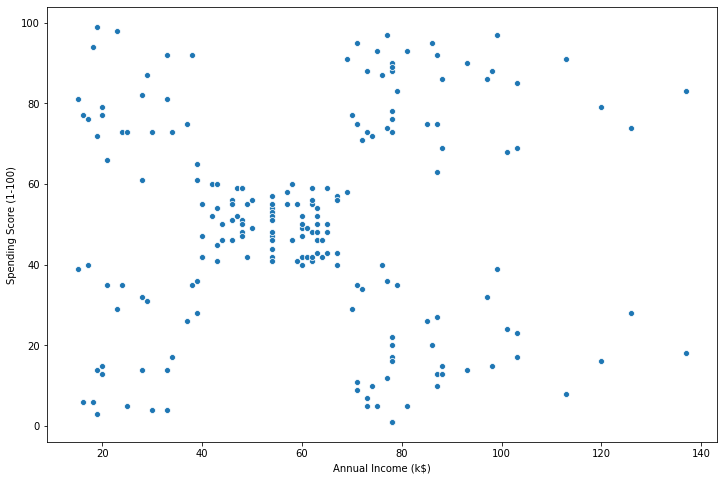

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x[x.columns[0]], x[x.columns[1]])

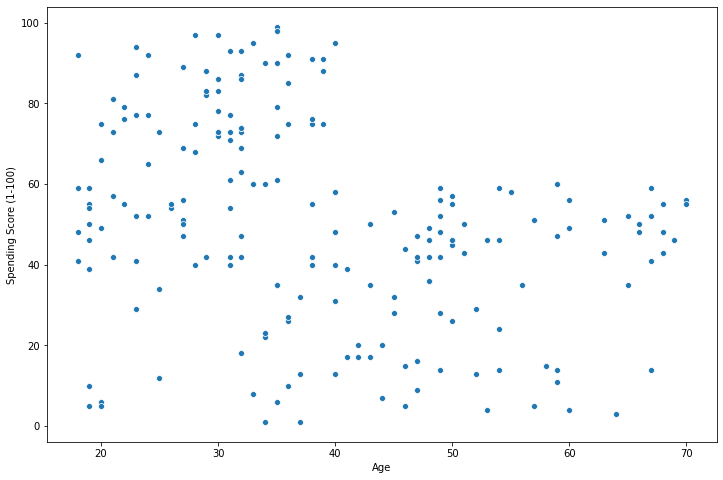

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data['Age'], data['Spending Score (1-100)'])

### Within Cluster Sum of Squares (WCSS)
$$\Large
WCSS(k)=\sum_{j=1}^{k}\sum_{x_i\in{cluster j}}(x_i-\bar{x}_j)^2$$
Where:
  * $k$ - number of clusters
  * $\bar{x}_j$ - mean of cluster $j$
  * $x_i$ - all samples that belong to cluster $j$

In [11]:
wcss = []

In [12]:
for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

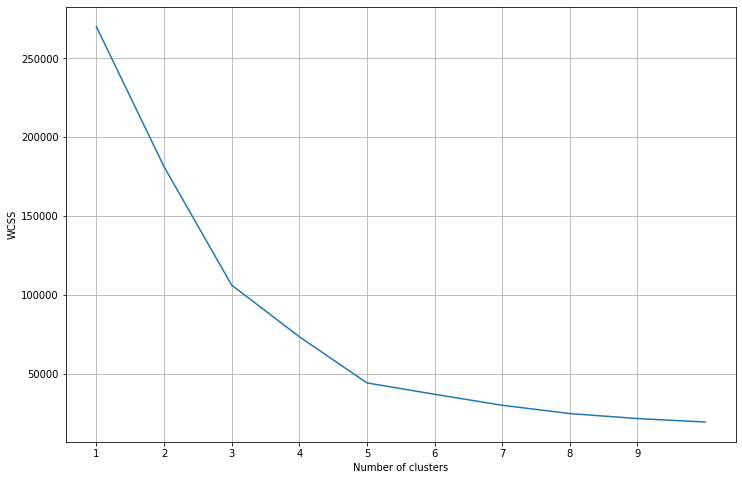

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.xticks(range(1, 10))
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5)

In [15]:
y_kmeans = kmeans.fit_predict(x)

In [28]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [16]:
data['cluster'] = y_kmeans

In [17]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


Text(0, 0.5, 'Spending Score (1-100)')

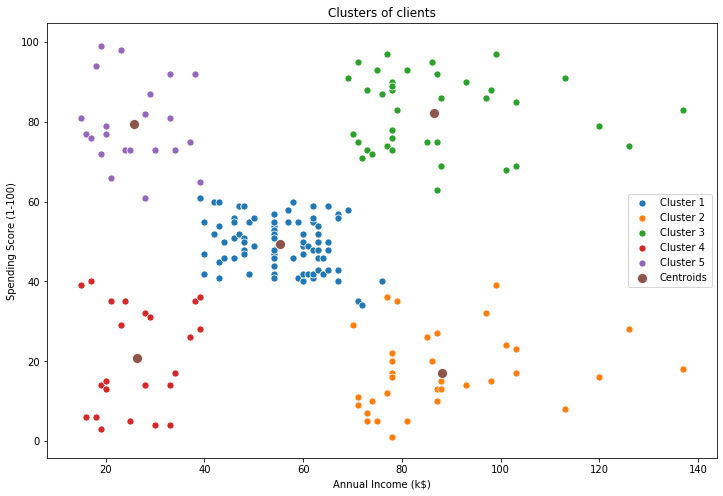

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=x.loc[data['cluster'] == 0], label='Cluster 1', s=50)
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=x.loc[data['cluster'] == 1], label='Cluster 2', s=50)
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=x.loc[data['cluster'] == 2], label='Cluster 3', s=50)
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=x.loc[data['cluster'] == 3], label='Cluster 4', s=50)
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=x.loc[data['cluster'] == 4], label='Cluster 5', s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')